# Predicting Bike Rental Demand Using Machine Learning Tools

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The main aims of the prac are: 

- to practice using tools for loading and viewing data sets;
- to visualise data in several ways and check for common pitfalls;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Note that some questions require writing a small amount of code, some require graphical results, and some require comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Most of the tasks in this assignment only require writing a few lines of code! One goal of the assignment is explore [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), [matplotlib](https://matplotlib.org/stable/index.html) and other libraries you will find useful throughout the course, so feel free to use the functions they provide. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

Chapter 2 of the reference book is based on a similar workflow to this prac, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant although do not use ones which directly relate to these questions with this dataset (which would normally only be found in someone else's assignment answers). If you take a large portion of code or text from the internet then you should reference where this was taken from, but we do not expect any references for small pieces of code, such as from documentation, blogs or tutorials. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.


In [55]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Step 1: Loading and initial processing of the dataset (20%)

Download the data set from MyUni using the link provided on the assignment page. A paper that describes one related version of this dataset is: Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020. Feel free to look at this if you want more information about the dataset.

The data is stored in a CSV (comma separated variable) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

**Load the data set from the csv file into a DataFrame, and summarise it with at least two appropriate pandas functions.**

In [56]:
### Your code here
import time # To calculate time taken to run particular steps

# Reading the csv file
bike_df = pd.read_csv("SeoulBikeData.csv")

# Displaying the 1st 5 rows of the DataFrame
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,No Holiday,Yes


In [57]:
# Displaying the name of each feature, count of records for each feature and its datatype
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   int64  
 5   Wind speed (m/s)           8759 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8759 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8758 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [58]:
# Displaying the descriptive statistics of features that are quantitative(numerical)
bike_df.describe()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2)
count,8760.000000,8760.000000,8760.000000,8760.000000,8759.000000,8760.000000,8759.000000,8760.000000
mean,704.602055,11.502740,12.914361,58.240183,1.953237,1436.442808,4.074369,0.569111
std,644.997468,6.922779,12.347109,20.584774,21.376612,608.827735,13.061011,0.868746
min,0.000000,0.000000,-17.800000,-26.000000,0.000000,-678.000000,-30.600000,0.000000
25%,191.000000,6.000000,3.500000,42.000000,0.900000,939.500000,-4.700000,0.000000
50%,504.500000,12.000000,13.700000,57.000000,1.500000,1697.500000,5.100000,0.010000
75%,1065.250000,18.000000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000
max,3556.000000,24.000000,306.000000,309.000000,2000.000000,2000.000000,27.200000,3.520000


### 1.2 Initial visualisation

To get a feeling for the data it is a good idea to do some form of simple visualisation.  **Display a set of histograms for the features** as they are right now, prior to any cleaning steps.

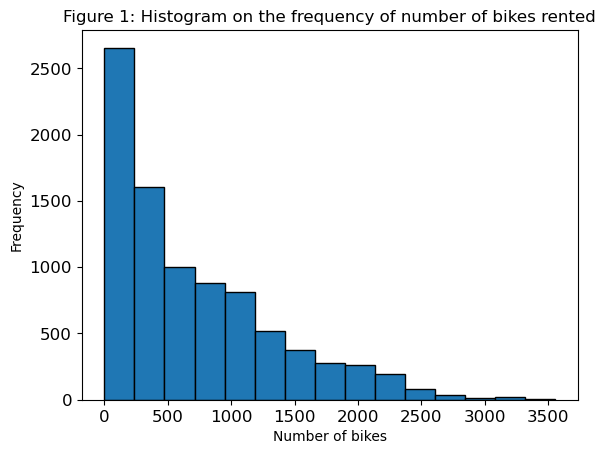

In [59]:
### Your code here

# Plotting the histogram for a particular feature
plt.hist(bike_df['Rented Bike Count'], bins = 15, edgecolor='black')

# Labelling the axes and adding a title
plt.xlabel('Number of bikes')
plt.ylabel('Frequency')
plt.title('Figure 1: Histogram on the frequency of number of bikes rented')

# Displaying the plot
plt.show()

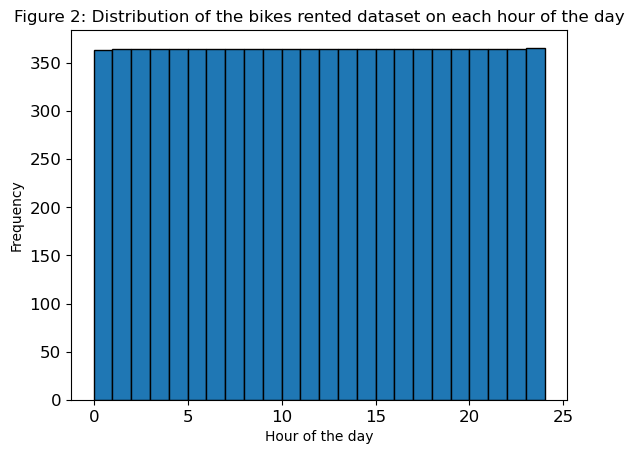

In [60]:
# Plotting the histogram for a particular feature
plt.hist(bike_df['Hour'], bins = 24, edgecolor='black')

# Labelling the axes and adding a title
plt.xlabel('Hour of the day')
plt.ylabel('Frequency')
plt.title('Figure 2: Distribution of the bikes rented dataset on each hour of the day')

# Displaying the plot
plt.show()

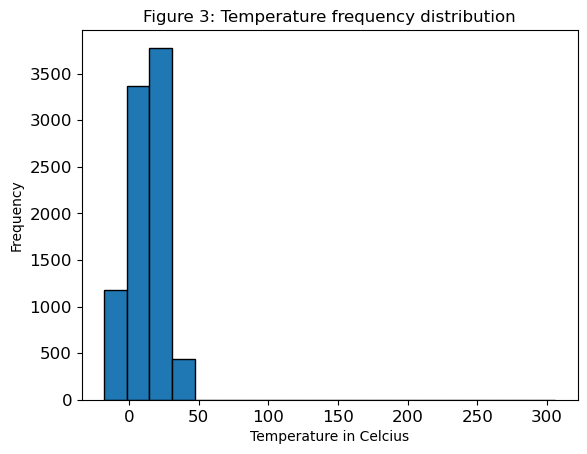

In [61]:
# Plotting the histogram for a particular feature
plt.hist(bike_df['Temperature (C)'], bins = 20, edgecolor='black')

# Labelling the axes and adding a title
plt.xlabel('Temperature in Celcius')
plt.ylabel('Frequency')
plt.title('Figure 3: Temperature frequency distribution')

# Displaying the plot
plt.show()

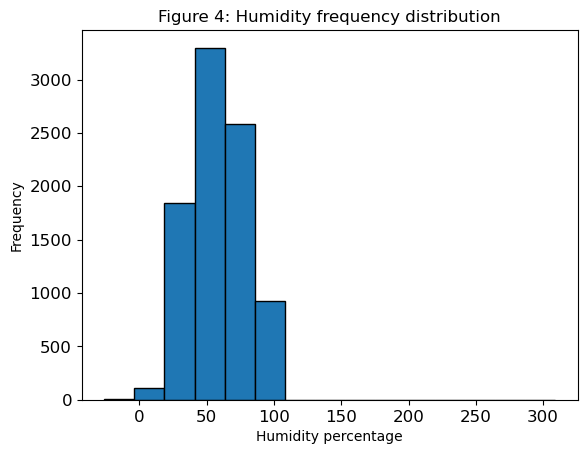

In [62]:
# Plotting the histogram for a particular feature
plt.hist(bike_df['Humidity (%)'], bins = 15, edgecolor='black')

# Labelling the axes and adding a title
plt.xlabel('Humidity percentage')
plt.ylabel('Frequency')
plt.title('Figure 4: Humidity frequency distribution')

# Displaying the plot
plt.show()

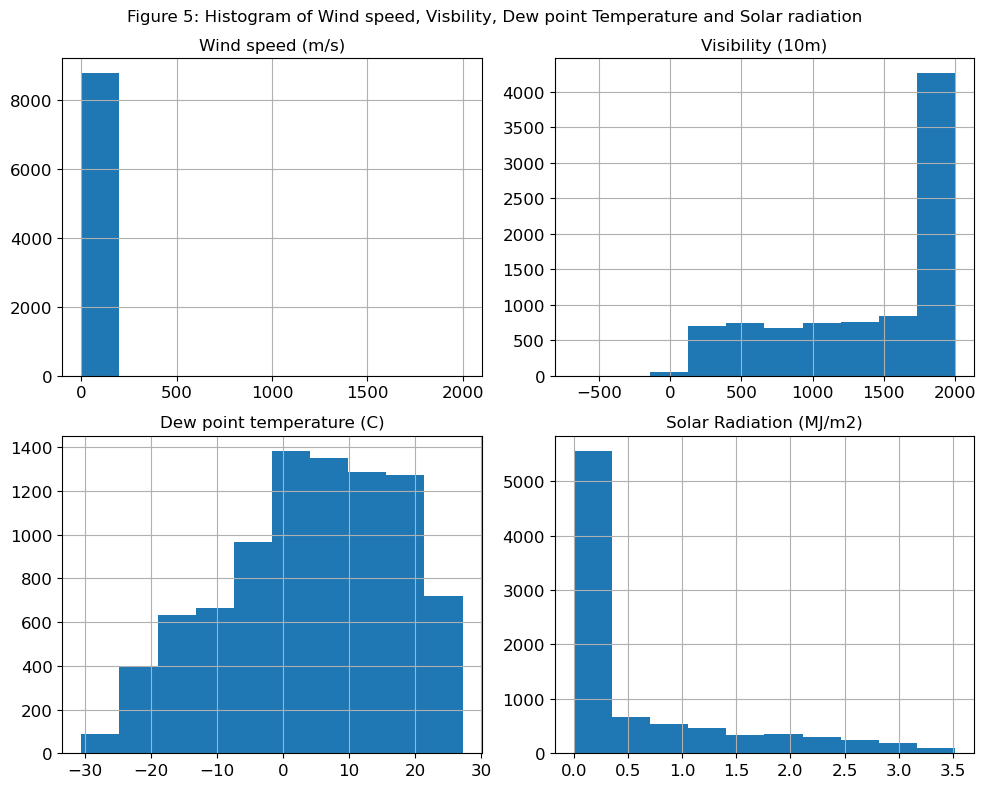

In [63]:
# Another method to display a set of histograms for each feature
bike_df.iloc[:,5:].hist(figsize=(10, 8))
plt.suptitle('Figure 5: Histogram of Wind speed, Visbility, Dew point Temperature and Solar radiation')
plt.tight_layout()
plt.show()

### 1.3 Removing unwanted information

The "Functioning day" feature records whether the bike rental was open for business on that day. For this assignment we are only interested in predicting demand on days when the business is open, so **remove rows from the DataFrame where the business is closed.** Hint: you can use the `DataFrame.loc()` function to do this. As a sanity check, ensure that the rows you are removing contain zero bike rentals! **After doing this, delete the Functioning Day feature from the DataFrame** and verify that this worked.

In [64]:
### Your code here

# Checking if any bikes were rented when business was closed
business_bike_count = bike_df[['Rented Bike Count', 'Functioning Day']].groupby('Functioning Day').sum()
print(business_bike_count)

# Removing records from the dataset when business is closed(i.e Functioning Day = Yes) only if no bikes were rented 
if int(business_bike_count.values[0]) == 0:
    bike_df = bike_df[bike_df['Functioning Day'] == 'Yes']

# Printing the unique values present in the dataframe after removing records
print("Unique Functioning Day values:", bike_df['Functioning Day'].unique())

# Deleting the Functioning Day feature
bike_df.drop('Functioning Day', axis = 1, inplace = True)

# Displaying the dataframe
bike_df.head()

                 Rented Bike Count
Functioning Day                   
No                               0
Yes                        6172314
Unique Functioning Day values: ['Yes']


,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,No Holiday


### 1.4 Numerical encoding

The main task is to predict future bike rental demand from this data. Hence the target feature is "Bike Rental Count". You will use regression techniques to do this, but this requires that the other features are numerical.

The Holiday and Season features both need to be converted to a simple numerical format. **Write code to convert the Holiday feature to 0 or 1 from its current format.** 

In [65]:
### Your code here

# Mapping(Converting) Holiday as 1 and No Holiday as 0 in the dataframe
bike_df['Holiday'] = bike_df['Holiday'].map({'Holiday': 1, 'No Holiday': 0})

# Displaying the Holiday feature
print(bike_df['Holiday'])

0       0
1       0
2       0
3       0
4       0
       ..
8755    0
8756    0
8757    0
8758    0
8759    0
Name: Holiday, Length: 8465, dtype: int64


The Season feature is a little tricker. A number could be assigned to each season, but a better solution in this case is to **add 4 new columns**, each labelled by a season, and each storing 0 or 1 according to the season in each row. In other words, the "Winter" column contains 1 whenever the season is winter, and 0 elsewhere. **Do this for each season. Afterwards, remember to delete the Season feature.**

In [66]:
### Your code here

# Storing the Seasons feature data into seasons variable
seasons = bike_df['Seasons']
# Displaying the data stored in the seasons variable
print(seasons.head())

# Creating new columns each representing a particular season
seasons_dummies = pd.get_dummies(seasons, drop_first=True)
# Displaying the newly created columns
print(seasons_dummies.head())

# Deleting the Seasons feature from the main dataframe
bike_df.drop('Seasons', axis = 1, inplace = True)
# Concatinating the newly created columns into the main dataframe
bike_df = pd.concat([bike_df,seasons_dummies], axis=1)
# Displaying the dataframe after above processing
bike_df.head()

0    Winter
1    Winter
2    Winter
3    Winter
4    Winter
Name: Seasons, dtype: object
   Spring  Summer  Winter
0       0       0       1
1       0       0       1
2       0       0       1
3       0       0       1
4       0       0       1


,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Spring,Summer,Winter
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,0,0,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,0,0,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,0,0,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,0,0,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,0,0,0,1


It is known that bike rentals depend strongly on whether it's a weekday or a weekend. **Replace the Date feature with a Weekday feature that stores 0 or 1 depending on whether the date represents a weekend or weekday.**  To do this, use the function `date_is_weekday` below, which returns 1 if it is a weekday and 0 if it is a weekend.

**Apply the function to the Date column in your DataFrame** (you can use `DataFrame.transform` to apply it).

In [67]:
import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

### Your code to apply the function here:

# Using the transform function on the Date feature to tranform it into 1's and 0's
bike_df['Date'] = bike_df['Date'].transform(date_is_weekday)
# Renaming the Date feature as Weekday feature
bike_df.rename(columns = {'Date': 'Weekday'}, inplace = True)
# Displaying the dataframe
bike_df.head()

,Weekday,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Spring,Summer,Winter
0,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,0,0,0,1
1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,0,0,0,1
2,1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,0,0,0,1
3,1,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,0,0,0,1
4,1,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,0,0,0,1


**Convert all the remaining data to numerical format**, with any non-numerical entries set to NaN.

In [68]:
### Your code here

# Using the apply and to_numeric function to convert features that are non-numerical into numerical format
# and replacing any non-numerical entries with NaN
bike_df = bike_df.apply(pd.to_numeric, errors='coerce')
# Finally checking how many null or NaN values are present
print(bike_df.isnull().sum())

Weekday                       0
Rented Bike Count             0
Hour                          0
Temperature (C)               0
Humidity (%)                  0
Wind speed (m/s)              1
Visibility (10m)              0
Dew point temperature (C)     1
Solar Radiation (MJ/m2)       0
Rainfall(mm)                 25
Snowfall (cm)                23
Holiday                       0
Spring                        0
Summer                        0
Winter                        0
dtype: int64


## Step 2: Visualise the data and perform further processing (20%)

### 2.1 Visualisation

Use **at least two graphical methods to display your data** and **identify** problematic entries. **Write one sentence** that summarises what you found about problematic entries.

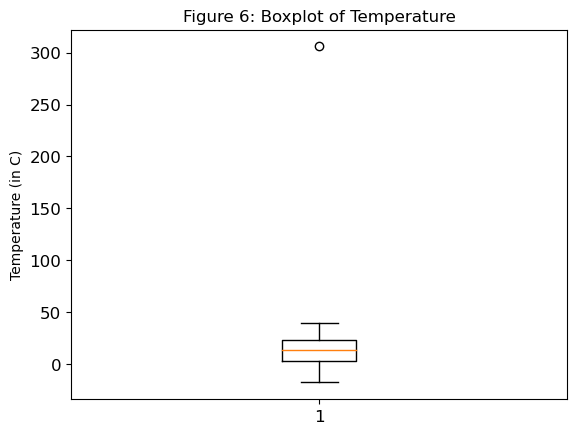

In [69]:
### Your code here

# Plotting the boxplot graph to show outliers in Temperature feature which are invalid
plt.boxplot(bike_df['Temperature (C)'])

# Labelling the axis and adding a title
plt.ylabel('Temperature (in C)')
plt.title('Figure 6: Boxplot of Temperature')

# Displaying the plot
plt.show()

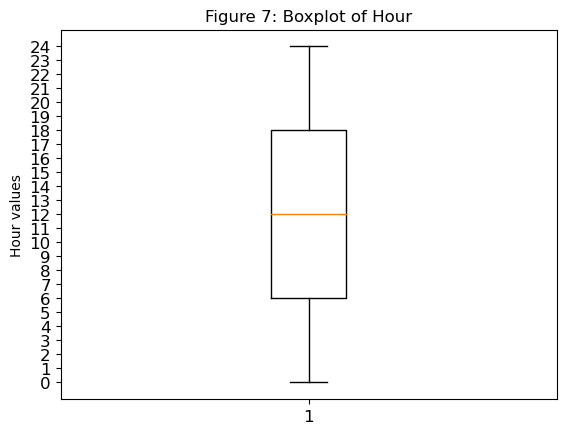

In [70]:
# Plotting the boxplot graph to show differnt values in Hour feature
plt.boxplot(bike_df['Hour'])

# setting the y-axis values, labelling the axis and adding a title
plt.yticks(np.arange(min(bike_df['Hour']), max(bike_df['Hour']) + 1, 1))
plt.ylabel('Hour values')
plt.title('Figure 7: Boxplot of Hour')

# Displaying the plot
plt.show()

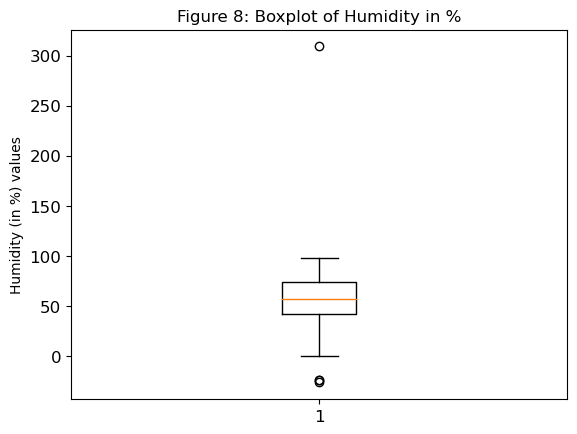

In [71]:
# Plotting the boxplot graph to show outliers of Humidity feature which are invalid
plt.boxplot(bike_df['Humidity (%)'])

# Labelling the axis and adding a title
#plt.yticks(np.arange(min(bike_df['Humidity (%)']), max(bike_df['Humidity (%)']) + 1, 50))
plt.ylabel('Humidity (in %) values')
plt.title('Figure 8: Boxplot of Humidity in %')

# Displaying the plot
plt.show()

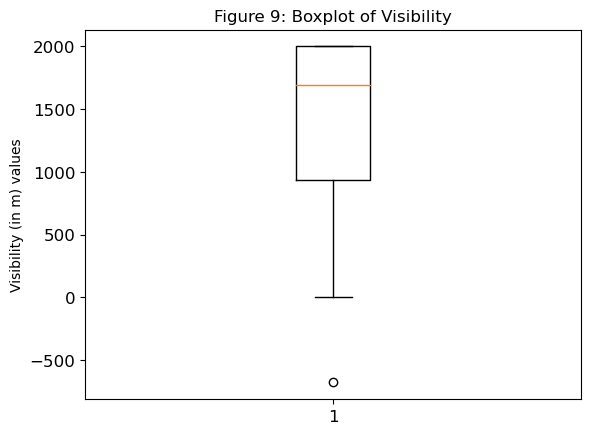

In [72]:
# Plotting the boxplot graph to show outliers of Humidity feature which are invalid
plt.boxplot(bike_df['Visibility (10m)'])

# Labelling the axis and adding a title
#plt.yticks(np.arange(min(bike_df['Humidity (%)']), max(bike_df['Humidity (%)']) + 1, 50))
plt.ylabel('Visibility (in m) values')
plt.title('Figure 9: Boxplot of Visibility')

# Displaying the plot
plt.show()

### What are the problematic entries visualised:

1. In Figure 6, for temperature there is an outlier > 300 degree C, which is not possible (on Earth atleast).
2. In Figure 7, the hour starts at 0 and ends at 24, which is wrong. It should be between 0-23.
3. In Figure 8, humidity is in percentage, which means it can be only between 0-100. There are values below 0 and above 100.
4. In Figure 9, for visibility there is an outlier at a point < 0, which is not possible(anywhere in the universe). The lowest value possible is 0.


### 2.2 Imputation and Pre-Processing

**Set any problematic values** in the numerical data to `np.nan` and check that this has worked. Once this is done, specify a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* any other pre-processing** that you think should be used. Just specify the pipeline - do ***not*** run it now.

In [73]:
### Your code here

# Additional libraries
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Taking care of invalid Temperature feature
bike_df['Temperature (C)'] = bike_df['Temperature (C)'].where(bike_df['Temperature (C)'] <= 100, np.nan)
# Taking care of Hour feature
bike_df['Hour'] = bike_df['Hour'].where(bike_df['Hour'] <= 23, np.nan)
# Taking care of Humidity feature
bike_df['Humidity (%)'] = bike_df['Humidity (%)'].where((bike_df['Humidity (%)'] >= 0) & (bike_df['Humidity (%)'] <= 100), np.nan)
# Taking care of Visibility feature
bike_df['Visibility (10m)'] = bike_df['Visibility (10m)'].where(bike_df['Visibility (10m)'] >= 0, np.nan)

pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])

### 2.3 Correlation 

It is also useful to look at how strongly correlated the features are to the desired target (Rented Bike Count). Before anything else is done it is necessary to **fit and apply the pipeline** above to make a *temporary* version of the whole dataset that is pre-processed.

In [74]:
### Your code here

# Copying original dataframe to transform
bike_df_cpy = bike_df.copy()
# Implementing the Pipeline created earlier on the features dataset
preproc_data = pipeline.fit_transform(bike_df_cpy)
# Creating a Dataframe of the transformed data
preproc_bike_df = pd.DataFrame(preproc_data, columns=bike_df_cpy.columns)
preproc_bike_df.drop('Rented Bike Count', axis=1, inplace=True)
preproc_bike_df.head()

,Weekday,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Spring,Summer,Winter
0,0.636563,-1.663224,-1.484785,-1.033601,0.010941,0.929587,-1.627128,-0.654079,-0.132495,-0.174951,-0.225032,-0.585308,-0.594041,1.708503
1,0.636563,-1.518702,-1.509574,-0.984756,-0.053449,0.929587,-1.627128,-0.654079,-0.132495,-0.174951,-0.225032,-0.585308,-0.594041,1.708503
2,0.636563,-1.374180,-1.550890,-0.935911,-0.044251,0.929587,-1.634680,-0.654079,-0.132495,-0.174951,-0.225032,-0.585308,-0.594041,1.708503
3,0.636563,-1.229658,-1.567416,-0.887065,-0.048850,0.929587,-1.627128,-0.654079,-0.132495,-0.174951,-0.225032,-0.585308,-0.594041,1.708503
4,0.636563,-1.085136,-1.550890,-1.082446,0.015540,0.929587,-1.702648,-0.654079,-0.132495,-0.174951,-0.225032,-0.585308,-0.594041,1.708503


### There are several reasons as to why we should not use the above version of pre-processed data:

1. The could be Data Leakage, meaning when preprocessing the data, certain steps like imputation and scaling are performed using the whole dataset. Using this data, for future analysis or modeling, could add information of the target variable (Rented Bike Count) into the feature data, potentially causing data leakage. Moreover, the feature data would just be preprocessed again causing more data variances. Also, reusing the preprocessed data does not account for these new data points

2. Independence is lot, the purpose of preprocessing is to transform the raw data to ensure independence and eliminate any bias or artifacts. Reusing the preprocessed data can reintroduce dependencies or biases that were initially removed during preprocessing.

3. Keeping the original raw data and the fitted pipeline instead of reusing the preprocessed data can ensure the reliability and generalizability of our analysis and modeling tasks.

To visualise the strength of the relationships, display a **scatter plot** for each feature (separately) vs the target variable.  Also **calculate the correlation** of each feature with the target (Hint: pandas function `corr()` or numpy `corrcoef()`).

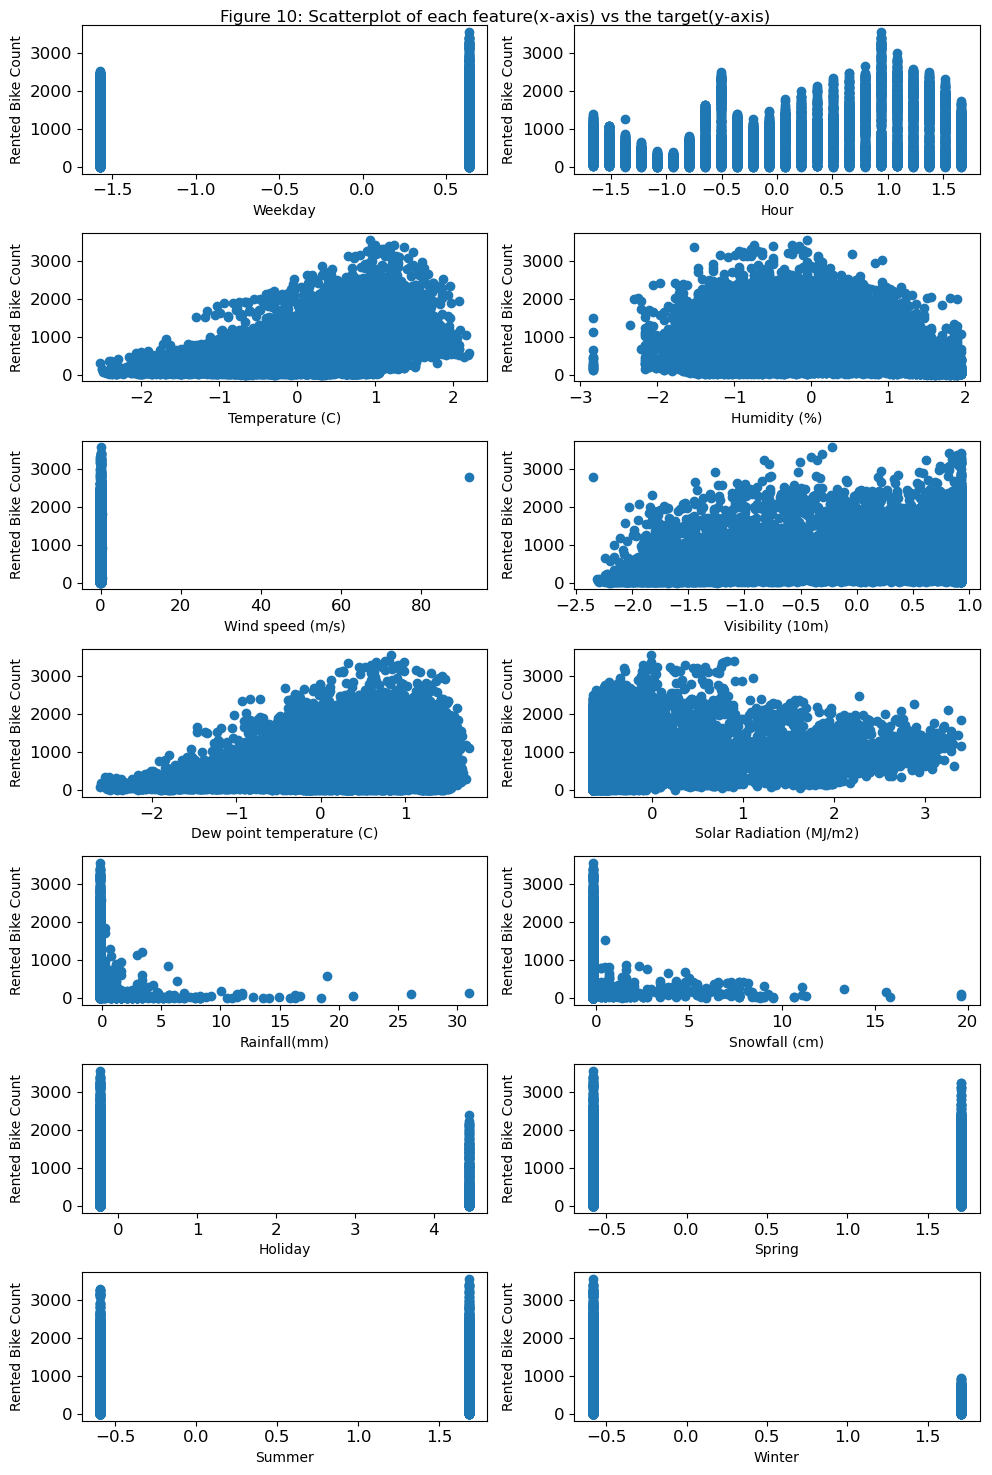

The correlation value of each feature vs the Rented Bike Count
Temperature (C)              0.520990
Dew point temperature (C)    0.436430
Hour                         0.344059
Summer                       0.288777
Solar Radiation (MJ/m2)      0.147364
Visibility (10m)             0.099725
Wind speed (m/s)             0.056316
Rainfall(mm)                 0.033520
Spring                       0.001711
Weekday                     -0.006267
Humidity (%)                -0.014075
Holiday                     -0.067620
Snowfall (cm)               -0.132163
Winter                      -0.467531
Name: Rented Bike Count, dtype: float64


In [75]:
### Your code here

# Splitting the dataframe into features and target values
X = bike_df.drop("Rented Bike Count", axis=1)
y = bike_df["Rented Bike Count"]

n_plots = len(X.columns)
n_cols = 2  # Number of columns per row
n_rows = (n_plots + n_cols - 1) // n_cols  # Calculate the number of rows needed(just for asthetic purpose)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 15))
# Converting the ndarray to a matplotlib Axes object for plotting the scatter
axes = axes.flatten()
for i, col in enumerate(X.columns):
    # Set the scatter plot in the corresponding subplot
    axes[i].scatter(preproc_bike_df[col], y)
    axes[i].set_xlabel(col)  # Set the x-axis label as the feature name
    axes[i].set_ylabel('Rented Bike Count')  # Set the y-axis label as 'y'

# Adjusting the layout and spacing between subplots
plt.suptitle('Figure 10: Scatterplot of each feature(x-axis) vs the target(y-axis)')
plt.tight_layout()
plt.show()

# Converting the y value into a dataframe to append to another dataframe
y_df = pd.DataFrame(y)
# Concatenating the 2 dataframes
preproc_bike_df = pd.concat([preproc_bike_df,y], axis=1)

# Creating the correlation matrix for all the features
corr_mat = preproc_bike_df.corr()
# Displaying the values corresponding to the target
corr_with_tgt = corr_mat['Rented Bike Count'].sort_values(ascending=False)
print('The correlation value of each feature vs the Rented Bike Count', corr_with_tgt[1:], sep='\n')

### Which 3 attributes are the most correlated with bike rentals?

Looking at above result stored in `corr_with_tgt`, the 3 most correlated features against Rented Bike Count are Temperature (0.52), Dew point Temperature (0.44) and Hour of the day (0.34).

## Step 3: Predicting bike rentals (25%)

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (rmse) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Build a pipeline** starting with the one specified in section 2.2 above, and now include a ***linear regression* model**. After you've done this, **fit** this to your training data for a quick test. To get an idea of how successful this model is, **calculate the rmse of the fit to the training data**. To act as a simple baseline for comparison, **also calculate the rmse** that you would get if all the predictions were equal to the **mean of the training targets** (i.e. bike rentals).


In [76]:
### Your code here

# Additional libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Splitting the data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression pipeline
pipeline_lr = Pipeline([('imputer', SimpleImputer(strategy='median')), 
                             ('scalar', StandardScaler()), 
                             ('model', LinearRegression())])

# Fitting the pipeline on the train set
pipeline_lr.fit(X_train, y_train)

# Predicting on the train set using the pipeline
y_train_lr = pipeline_lr.predict(X_train)

# Root mean squared error (RMSE) on train set
rmse_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))

print("Root Mean Squared Error (RMSE):", round(rmse_lr,2))

Root Mean Squared Error (RMSE): 437.18


Show an appropriate **visualisation of the fit for your linear regression.**

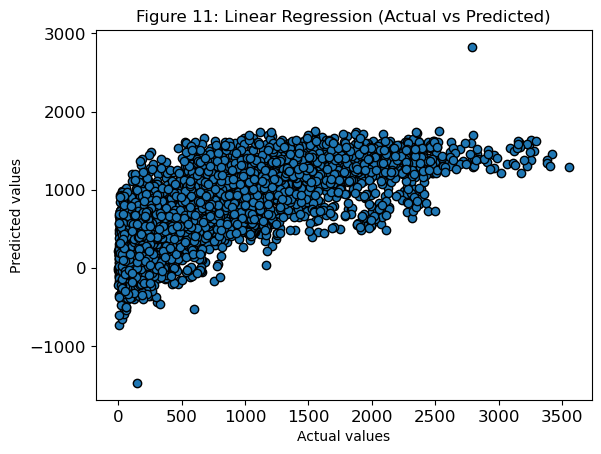

In [77]:
### Your code here
# Scatterplot of predicted vs actual values
plt.scatter(y_train, y_train_lr, edgecolor='k')
#plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Figure 11: Linear Regression (Actual vs Predicted)')
plt.show()

Now two other, different regression models (that you probably won't be familiar with) will be fit and later these will be compared to find the best one.

The second model to fit is ***Kernel Ridge*** regression (`from sklearn.kernel_ridge import KernelRidge`). **Build a pipeline using this and fit it to your training data**, using the default settings. Again, **plot the fit and display the rmse for the training dataset.**

Root Mean Squared Error (RMSE): 852.09


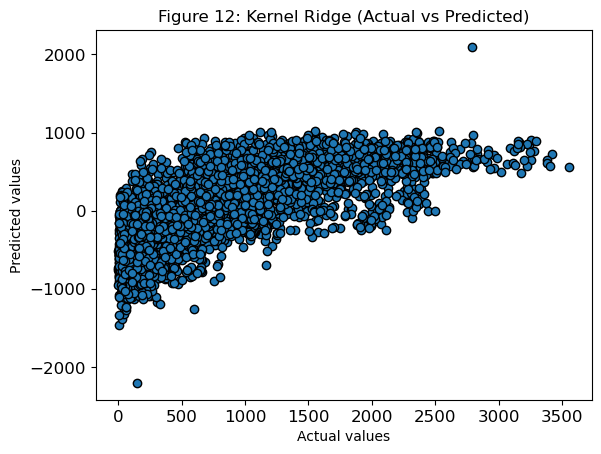

In [78]:
### Your code here

from sklearn.kernel_ridge import KernelRidge

# Kernel Ridge pipeline
pipeline_kr = Pipeline([('imputer', SimpleImputer(strategy='median')), 
                             ('scalar', StandardScaler()), 
                             ('model', KernelRidge())])

# Fitting the pipeline on the train set
pipeline_kr.fit(X_train, y_train)

# Predicting on the train set using the pipeline
y_train_kr = pipeline_kr.predict(X_train)

# Root mean squared error (RMSE) on train set
rmse_kr = np.sqrt(mean_squared_error(y_train, y_train_kr))

print("Root Mean Squared Error (RMSE):", round(rmse_kr,2))

# Scatterplot of predicted vs actual values
plt.scatter(y_train, y_train_kr, edgecolor='k')
#plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Figure 12: Kernel Ridge (Actual vs Predicted)')
plt.show()

The third, is ***Support Vector Regression*** (`from sklearn.svm import SVR`). **Build a pipeline using this and fit it to your training data**, using the default settings. Again, **plot the fit and display the rmse for the training dataset.**

Root Mean Squared Error (RMSE): 520.44


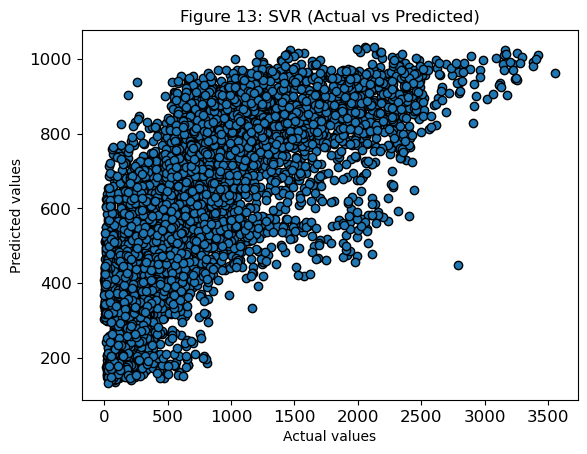

In [79]:
### Your code here

from sklearn.svm import SVR

# SVR pipeline
pipeline_svr = Pipeline([('imputer', SimpleImputer(strategy='median')), 
                             ('scalar', StandardScaler()), 
                             ('model', SVR())])

# Fitting the pipeline on the train set
pipeline_svr.fit(X_train, y_train)

# Predicting on train set using the pipeline
y_train_svr = pipeline_svr.predict(X_train)

# Root mean squared error (RMSE) for train set
rmse_svr = np.sqrt(mean_squared_error(y_train, y_train_svr))

print("Root Mean Squared Error (RMSE):", round(rmse_svr,2))

# Scatterplot of predicted vs actual values
plt.scatter(y_train, y_train_svr, edgecolor='k')
#plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Figure 13: SVR (Actual vs Predicted)')
plt.show()

## Step 4: Cross validation (20%)

**Perform a *10 fold cross validation* for each model.** This splits the training set (that we've used above) into 10 equal size subsets, and uses each in turn as the validation set while training a model with the other 9. You should therefore have 10 rmse values for each cross validation run.

**Display the mean and standard deviation of the rmse values** obtained for each model **for the validation splits** using the same settings/parameters for the models as used above. **Also display the mean and standard deviation** of the rmse values obtained for the **training data splits**.

In [80]:
### Your code here

from sklearn.model_selection import cross_val_score

print("Linear Regression details:")
start_time = time.time()
lr_cv_rmse = cross_val_score(pipeline_lr, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
end_time = time.time()
print("RMSE values for each fold:",np.round(-lr_cv_rmse,2))
print("Mean RMSE:", np.round((-lr_cv_rmse).mean(),2))
print("RMSE standard deviation:", np.round((-lr_cv_rmse).std(),2))
print("Time taken in secs:", round(end_time-start_time,3))
print("=====================")
print("Kernel Ridge details:")
start_time = time.time()
kr_cv_rmse = cross_val_score(pipeline_kr, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
end_time = time.time()
print("RMSE values for each fold:",np.round(-kr_cv_rmse,2))
print("Mean RMSE:", np.round((-kr_cv_rmse).mean(),2))
print("RMSE standard deviation:", np.round((-kr_cv_rmse).std(),2))
print("Time taken in secs:", round(end_time-start_time,3))
print("============")
print("SVR details:")
start_time = time.time()
svr_cv_rmse = cross_val_score(pipeline_svr, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
end_time = time.time()
print("RMSE values for each fold:",np.round(-svr_cv_rmse,2))
print("Mean RMSE:", np.round((-svr_cv_rmse).mean(),2))
print("RMSE standard deviation:", np.round((-svr_cv_rmse).std(),2))
print("Time taken in secs:", round(end_time-start_time,3))

Linear Regression details:
RMSE values for each fold: [ 434.47  445.62  444.7   466.51  442.06  419.71  422.44 1272.62  424.26
  424.38]
Mean RMSE: 519.68
RMSE standard deviation: 251.35
Time taken in secs: 0.465
Kernel Ridge details:
RMSE values for each fold: [ 852.88  856.27  847.19  871.16  847.21  827.46  855.28 1459.37  846.86
  834.75]
Mean RMSE: 909.84
RMSE standard deviation: 183.52
Time taken in secs: 48.197
SVR details:
RMSE values for each fold: [526.5  540.18 522.01 548.55 534.2  495.67 515.15 573.42 528.21 502.71]
Mean RMSE: 528.66
RMSE standard deviation: 21.34
Time taken in secs: 77.918


### Which models were under-fitting or over-fitting and which method is the best out of these three?

1. To know if the model is under-fitting or over-fitting, we need to find the respective RMSE values on test set and compare. If there is train RMSE is high when compared to test RMSE, then the model is under-fitting as the model is not capturing the underlying patterns and complexities present in the data. In case the train RMSE is lower than the test RMSE, then the model is over-fitting as the model starts to memorize the training data instead of generalizing well to unseen data.

2. Off the 3 models, Linear Regression, Kernel Ridge and SVR, SVR performs the best since it has the least mean RMSE value and lowest standard deviation among the 3. Although Linear Regression has a lower RMSE than SVR RMSE, their difference is significantly smaller when compared to the difference of their Standard Deviations, and since SVR has a lower Standard Deviation than Linear Rigression, SVR model is the best. Another point to notice is that, in the CV for Linear Reg and Kernel Ridge, the 8th fold have very high RMSE, but the 8th fold RMSE in SVR remains in the same range as others.

## Step 5: Grid parameter search (15%)

Both the Kernel Ridge Regression and Support Vector Regression have hyperparameters that can be adjusted to suit the problem. **Choose either the KernelRidge or SVR** (your choice entirely), and use grid search to systematically compare the generalisation performance (rmse) obtained with different hyperparameter settings (still with 10-fold CV). Use the sklearn function `GridSearchCV` to do this. 

For KernelRidge, vary the hyperparameter `alpha`.

For SVR, vary the hyperparameter `C`.

**Print out the hyperparameter setting** for the best (i.e. chosen) method. 

Finally, **train and apply your chosen method**, with appropriate hyperparameter settings, to the ***test set* and report the performance**. 

In [81]:
### Your code here
from sklearn.model_selection import GridSearchCV

param_grid = {'model__C': [0.1, 1, 10]} # Incrementes of 1 decimal point

# Create an instance of GridSearchCV
grid_search = GridSearchCV(pipeline_svr, param_grid, scoring='neg_root_mean_squared_error', cv=10)

# Perform grid search with cross-validation
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and best RMSE score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best CV RMSE Score:", round(-grid_search.best_score_,2))

# Setting the best value of C to the pipeline for SVR model
pipeline_svr.set_params(**grid_search.best_params_)
# Fitting the train model with new parameter of C
pipeline_svr.fit(X_train, y_train)
# Predicting on test set
y_test_svr = pipeline_svr.predict(X_test)
# RMSE of test set
test_rmse_svr = np.sqrt(mean_squared_error(y_test, y_test_svr))
print("Test RMSE:", round(test_rmse_svr,2))

Best Hyperparameters: {'model__C': 10}
Best CV RMSE Score: 393.07
Test RMSE: 361.18


### How different was the test set performance to the validation performance, and is this suggestive of over-fitting, under-fitting or neither?

1. The test set performed slightly better than the validation set, as test set yielded lower RMSE, but the difference is not much.

2. Since the difference in RMSE between the validation and test sets is relatively small, we can say that the model's performance is consistent across different data samples. Hence, the model is generalizing well and able to make accurate predictions on unseen data. Therefore, this suggests that the model is neither over-fitting nor under-fitting.

3. The small difference in RMSE between the two sets can be due to the natural sampling variation.